In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/dataset/Car details v3.csv')

In [3]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#Data Analysis and Preprocessing

In [4]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Split the 'name' column into 'brand' (first word) and 'model' (remaining words).
df1['brand'] = df1['name'].apply(lambda x: x.split(' ')[0])
df1['model'] = df1['name'].apply(lambda x: ' '.join(x.split(' ')[1:]))
display(df1.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


In [6]:
# Remove string values from numeric columns and convert them to float64 datatype.
def clean_numeric_column(column):
    return pd.to_numeric(column.astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')

df1['mileage'] = clean_numeric_column(df1['mileage'])
df1['engine'] = clean_numeric_column(df1['engine'])
df1['max_power'] = clean_numeric_column(df1['max_power'])

print(df1[['mileage', 'engine', 'max_power']].dtypes)

# For the 'torque' feature, extract the first numeric value and convert to float, discarding other characters.
df1['torque'] = df1['torque'].astype(str)

df1['torque'] = pd.to_numeric(df1['torque'].str.extract(r'(\d+\.?\d*)', expand=False), errors='coerce')

df1['torque'].fillna(df1['torque'].median(), inplace=True)
display(df1.head(1))

mileage      float64
engine       float64
max_power    float64
dtype: object


/tmp/ipython-input-4051388028.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['torque'].fillna(df1['torque'].median(), inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,190.0,5.0,Maruti,Swift Dzire VDI


In [7]:
df1['car_age'] = 2025 - df1['year']
df1.drop('year', axis=1, inplace=True)

In [8]:
print("Missing values before imputation:")
print(df1[['mileage', 'engine', 'max_power', 'seats']].isnull().sum())

df1['mileage'].fillna(df1['mileage'].median(), inplace=True)
df1['engine'].fillna(df1['engine'].median(), inplace=True)
df1['max_power'].fillna(df1['max_power'].median(), inplace=True)
df1['seats'].fillna(df1['seats'].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(df1[['mileage', 'engine', 'max_power', 'seats']].isnull().sum())

Missing values before imputation:
mileage      221
engine       221
max_power    216
seats        221
dtype: int64

Missing values after imputation:
mileage      0
engine       0
max_power    0
seats        0
dtype: int64


/tmp/ipython-input-3783566442.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['mileage'].fillna(df1['mileage'].median(), inplace=True)
/tmp/ipython-input-3783566442.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

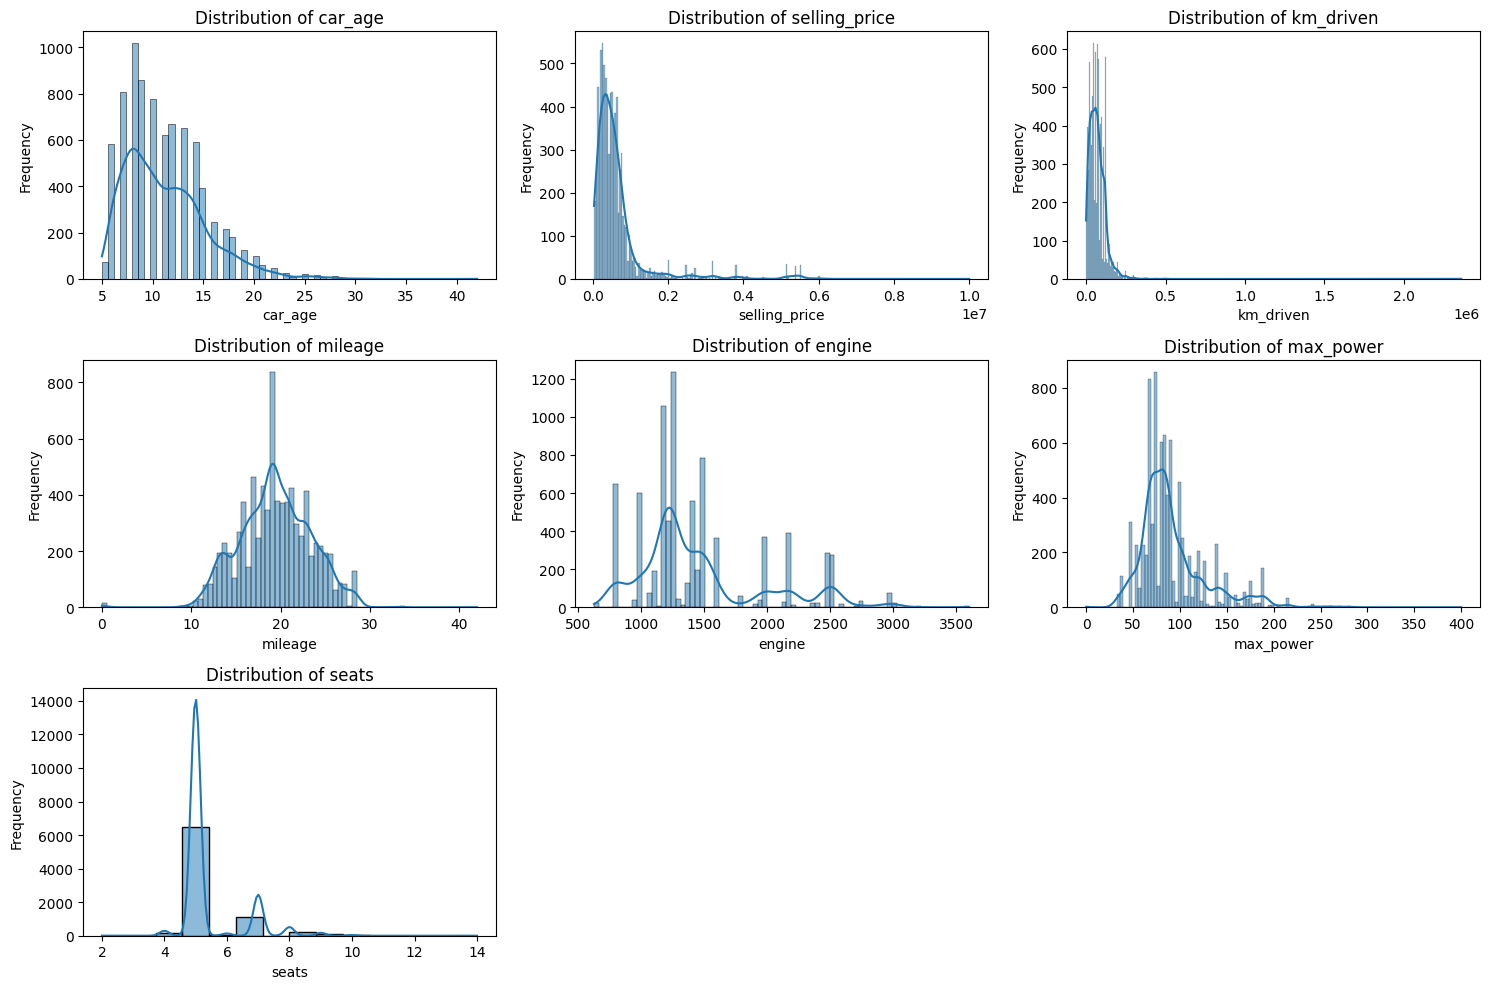

In [9]:
# Plotting the distribution of numerical features.
numerical_cols = ['car_age', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

correlation matrix of numerical features using a heatmap.



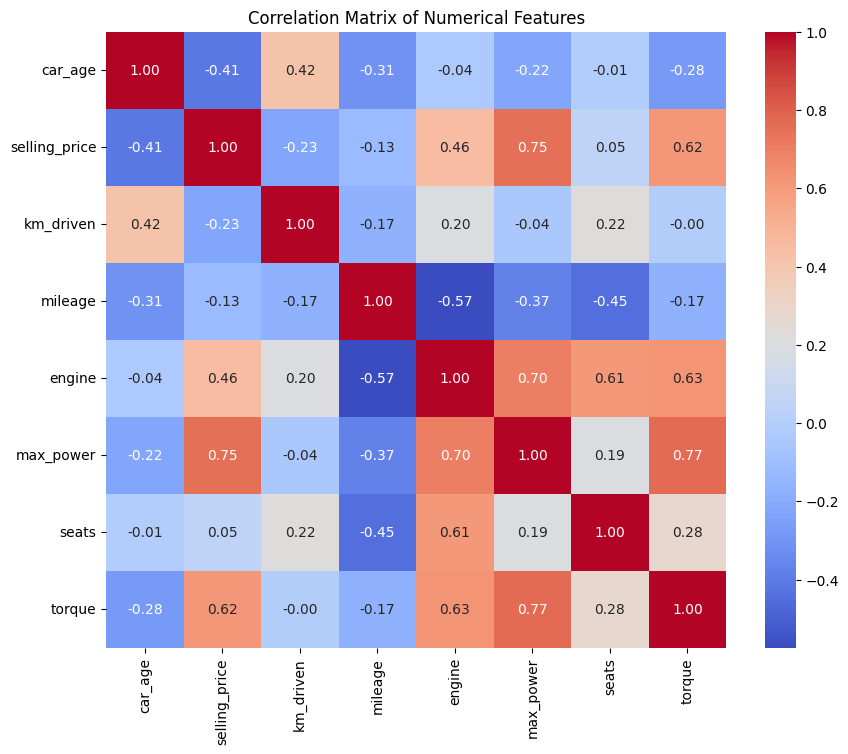

In [10]:

# Drop rows with NaN values created during cleaning in these specific columns for correlation calculation
df_corr = df1.dropna(subset=['mileage', 'engine', 'max_power', 'car_age', 'selling_price', 'km_driven', 'seats']).copy()


numerical_cols = ['car_age', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','torque']
correlation_matrix = df_corr[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

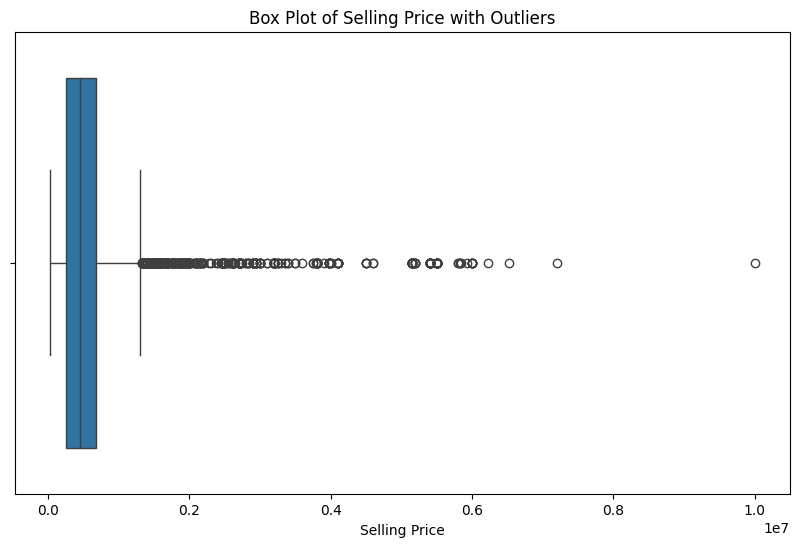

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['selling_price'])
plt.title('Box Plot of Selling Price with Outliers')
plt.xlabel('Selling Price')
plt.show()

Original DataFrame shape: (8128, 15)
DataFrame shape after removing outliers: (7528, 15)


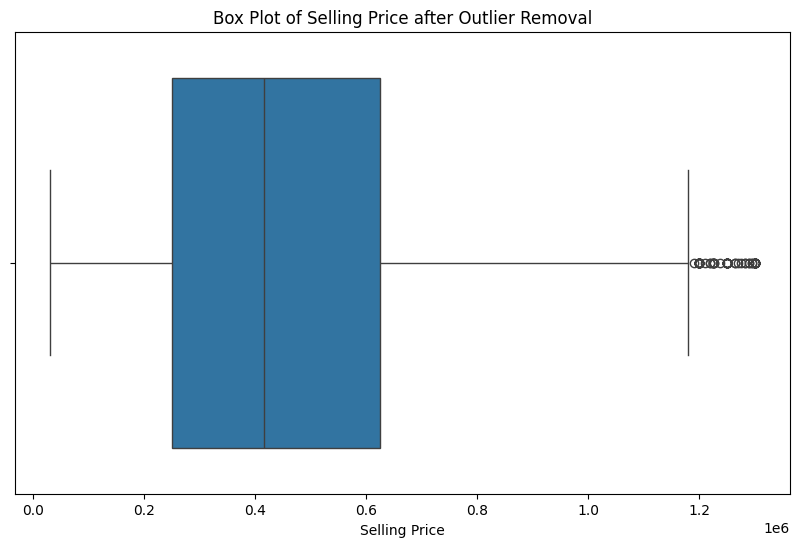

In [12]:
# Calculate the IQR for 'selling_price'
Q1 = df1['selling_price'].quantile(0.25)
Q3 = df1['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1_cleaned = df1[(df1['selling_price'] >= lower_bound) & (df1['selling_price'] <= upper_bound)].copy()

print(f"Original DataFrame shape: {df1.shape}")
print(f"DataFrame shape after removing outliers: {df1_cleaned.shape}")

# Update df1 to the cleaned DataFrame
df1 = df1_cleaned

# Display the box plot again to see the result after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['selling_price'])
plt.title('Box Plot of Selling Price after Outlier Removal')
plt.xlabel('Selling Price')
plt.show()

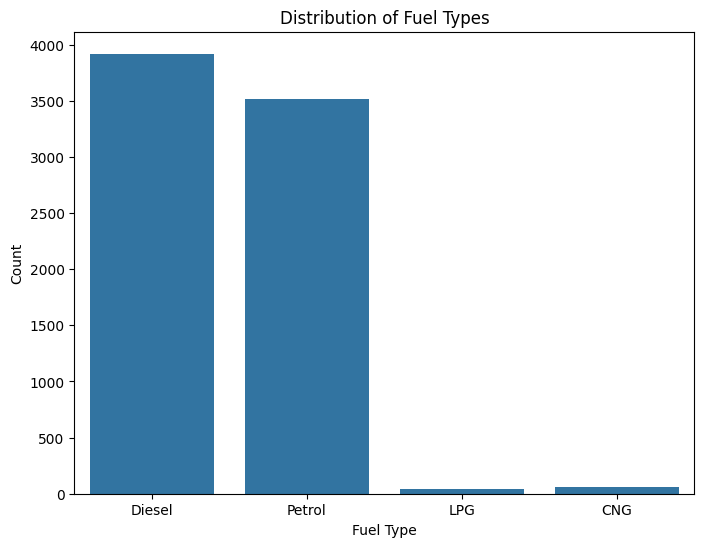

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df1['fuel'])
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

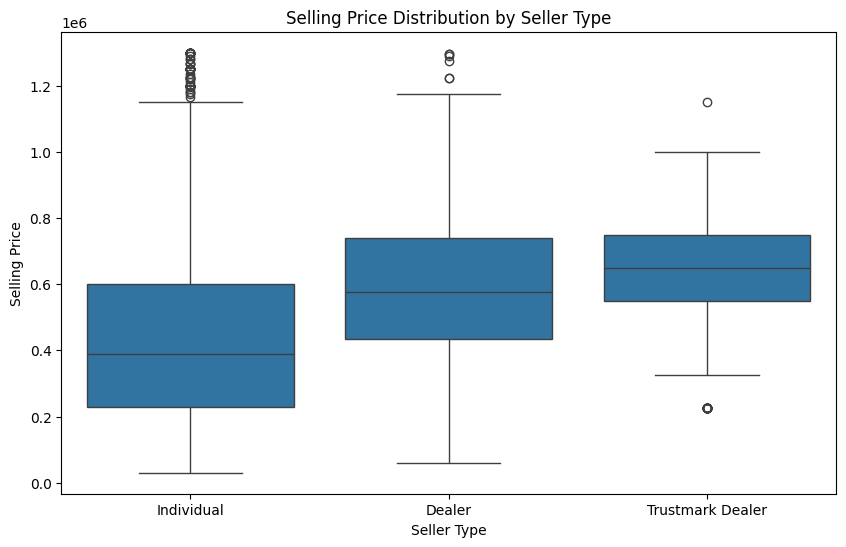

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df1)
plt.title('Selling Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

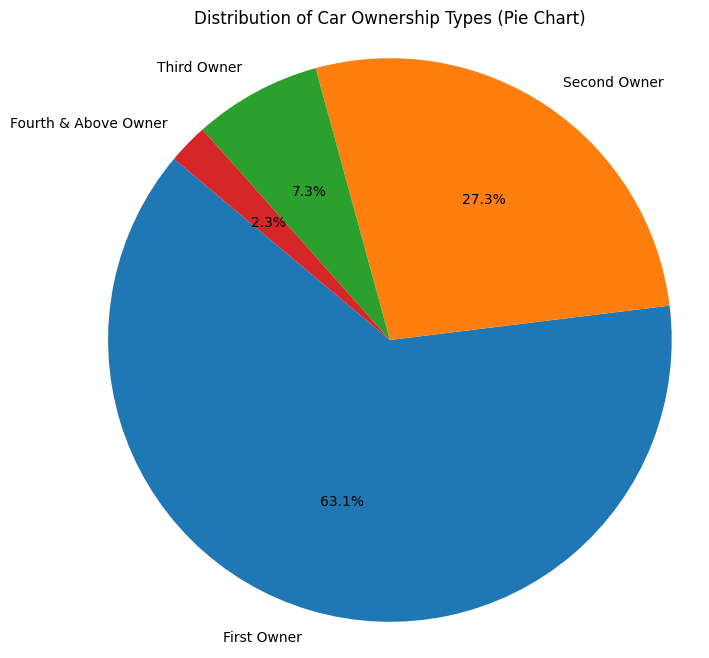

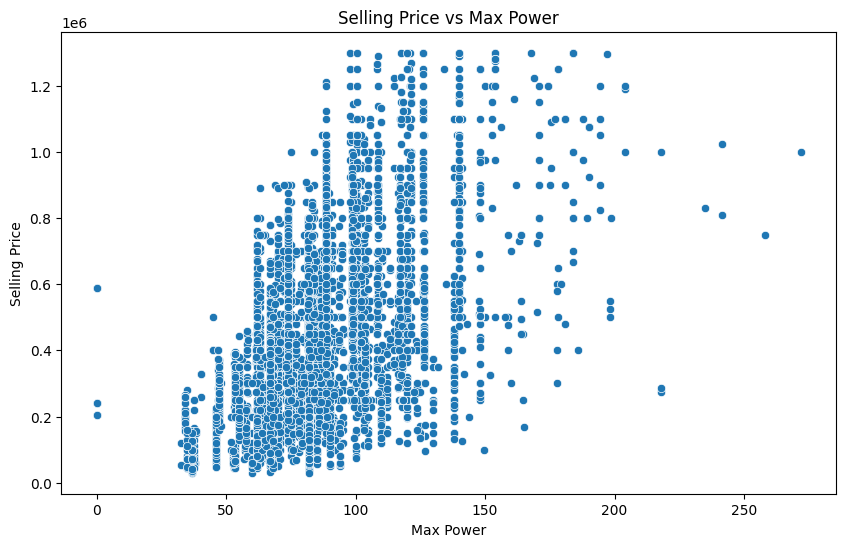

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['max_power'], y=df1['selling_price'])
plt.title('Selling Price vs Max Power')
plt.xlabel('Max Power')
plt.ylabel('Selling Price')
plt.show()

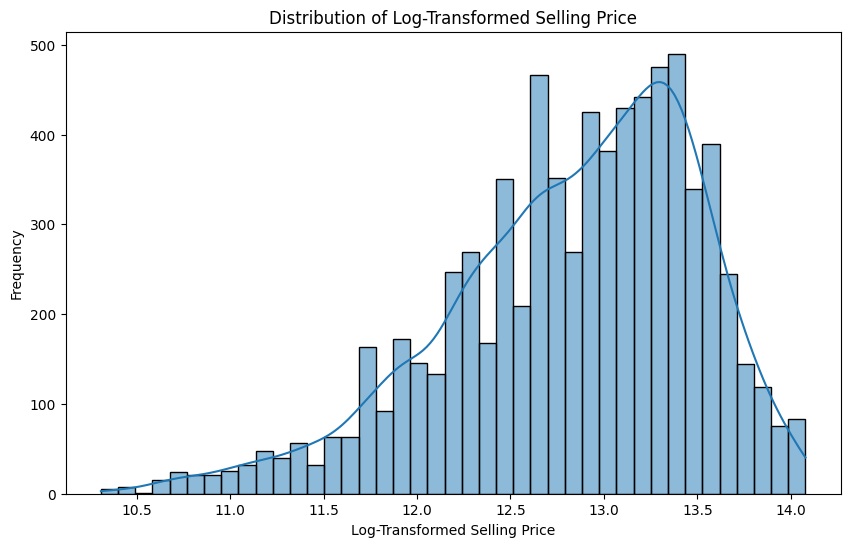

In [24]:
# Apply logarithmic transformation to the 'selling_price'
df1['selling_price_log'] = np.log1p(df1['selling_price'])

# Display the distribution of the transformed selling price
plt.figure(figsize=(10, 6))
sns.histplot(df1['selling_price_log'], kde=True)
plt.title('Distribution of Log-Transformed Selling Price')
plt.xlabel('Log-Transformed Selling Price')
plt.ylabel('Frequency')
plt.show()

In [25]:
categorical_cols_to_encode = ['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model']

categorical_cols_present = [col for col in categorical_cols_to_encode if col in df1.columns]

# Perform one-hot encoding on the specified categorical columns
df1_encoded = pd.get_dummies(df1, columns=categorical_cols_present, drop_first=True)

df1 = df1_encoded # Update df1 to the encoded DataFrame

print(df1.shape)
display(df1.head())

(7528, 1953)


,name,selling_price,km_driven,mileage,engine,max_power,torque,seats,car_age,selling_price_log,...,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Petrol CVT Asta,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz AT 1.4,model_i20 Sportz Diesel,model_i20 Sportz Option 1.2,model_i20 Sportz Option 1.4 CRDi
0,Maruti Swift Dzire VDI,450000,145500,23.40,1248.0,74.00,190.0,5.0,11,13.017005,...,False,False,False,False,False,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,21.14,1498.0,103.52,250.0,5.0,11,12.821261,...,False,False,False,False,False,False,False,False,False,False
2,Honda City 2017-2020 EXi,158000,140000,17.70,1497.0,78.00,12.7,5.0,19,11.970357,...,False,False,False,False,False,False,False,False,False,False
3,Hyundai i20 Sportz Diesel,225000,127000,23.00,1396.0,90.00,22.4,5.0,15,12.323860,...,False,False,False,False,False,False,False,True,False,False
4,Maruti Swift VXI BSIII,130000,120000,16.10,1298.0,88.20,11.5,5.0,18,11.775297,...,False,False,False,False,False,False,False,False,False,False


In [26]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = ['car_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

scaler = StandardScaler()

df1[numerical_cols_to_scale] = scaler.fit_transform(df1[numerical_cols_to_scale])

display(df1.head())

,name,selling_price,km_driven,mileage,engine,max_power,torque,seats,car_age,selling_price_log,...,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Petrol CVT Asta,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz AT 1.4,model_i20 Sportz Diesel,model_i20 Sportz Option 1.2,model_i20 Sportz Option 1.4 CRDi
0,Maruti Swift Dzire VDI,450000,1.275110,0.954651,-0.317699,-0.413366,190.0,-0.417274,-0.116216,13.017005,...,False,False,False,False,False,False,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,370000,0.829735,0.376572,0.237000,0.751040,250.0,-0.417274,-0.116216,12.821261,...,False,False,False,False,False,False,False,False,False,False
2,Honda City 2017-2020 EXi,158000,1.179048,-0.503335,0.234781,-0.255588,12.7,-0.417274,1.860893,11.970357,...,False,False,False,False,False,False,False,False,False,False
3,Hyundai i20 Sportz Diesel,225000,0.951995,0.852336,0.010683,0.217748,22.4,-0.417274,0.872339,12.323860,...,False,False,False,False,False,False,False,True,False,False
4,Maruti Swift VXI BSIII,130000,0.829735,-0.912594,-0.206759,0.146748,11.5,-0.417274,1.613754,11.775297,...,False,False,False,False,False,False,False,False,False,False


In [27]:
X = df1.drop(['selling_price','name'], axis=1)
y = df1['selling_price']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (7528, 1951)
Shape of target (y): (7528,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6022, 1951)
Shape of X_test: (1506, 1951)
Shape of y_train: (6022,)
Shape of y_test: (1506,)


#Linear Regression


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import cross_val_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"--- Metrics on Test Data ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2_test}")

# Perform cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print(f"\n--- Cross-Validation R2 Scores (5-fold) ---")
print(f"R2 Scores per fold: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")

--- Metrics on Test Data ---
Mean Squared Error (MSE): 3824240441.745122
Root Mean Squared Error (RMSE): 61840.44341484884
Mean Absolute Error (MAE): 39293.16439712511
R-squared (R2): 0.9409571822014541

--- Cross-Validation R2 Scores (5-fold) ---
R2 Scores per fold: [0.91361881 0.93529165 0.93910537 0.92689492 0.93533705]
Mean Cross-Validation R2 Score: 0.930049560862896


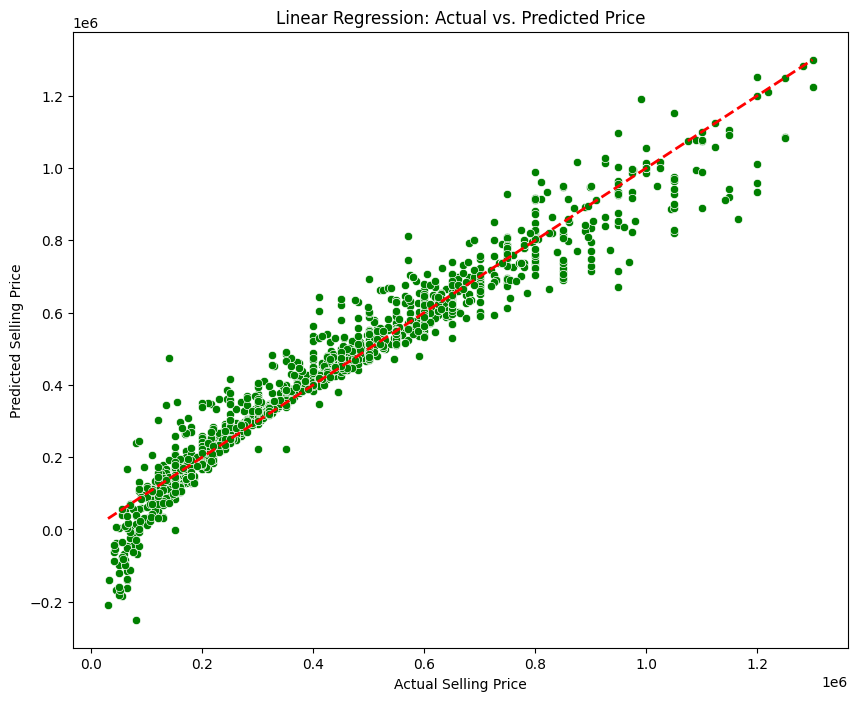

In [31]:
y_pred_log = model.predict(X_test)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_log, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Linear Regression: Actual vs. Predicted Price")
plt.show()

#Ridge Regression

In [32]:
#Hyperparameter tuning Using RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


ridge = Ridge()
para_list = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

randomized = RandomizedSearchCV(ridge,para_list,cv=5)
randomized.fit(X_train,y_train)

print(randomized.best_params_)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'alpha': 0.1}


In [33]:

y_pred = randomized.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- Metrics on Test Data ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2_test}")

# Perform cross-validation on the training data
cv_scores = cross_val_score(randomized, X_train, y_train, cv=5, scoring='r2')

print(f"\n--- Cross-Validation R2 Scores (5-fold) ---")
print(f"R2 Scores per fold: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")

--- Metrics on Test Data ---
Mean Squared Error (MSE): 3635400717.6957536
Root Mean Squared Error (RMSE): 60294.284287117574
Mean Absolute Error (MAE): 38950.190065610615
R-squared (R2): 0.9409571822014541


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/


--- Cross-Validation R2 Scores (5-fold) ---
R2 Scores per fold: [0.94153176 0.93896273 0.94162052 0.93561719 0.94274632]
Mean Cross-Validation R2 Score: 0.9400957035729084


In [34]:
#Hyperparameter tuning Using GridSearchCV
gridsearch = GridSearchCV(ridge,para_list,cv=5)
gridsearch.fit(X_train,y_train)

print(gridsearch.best_params_)

y_pred = gridsearch.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- Metrics on Test Data ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2_test}")

cv_scores = cross_val_score(gridsearch, X_train, y_train, cv=5, scoring='r2')

print(f"\n--- Cross-Validation R2 Scores (5-fold) ---")
print(f"R2 Scores per fold: {cv_scores}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores)}")

{'alpha': 0.1}
--- Metrics on Test Data ---
Mean Squared Error (MSE): 3635400717.6957536
Root Mean Squared Error (RMSE): 60294.284287117574
Mean Absolute Error (MAE): 38950.190065610615
R-squared (R2): 0.9409571822014541

--- Cross-Validation R2 Scores (5-fold) ---
R2 Scores per fold: [0.94153176 0.93896273 0.94162052 0.93561719 0.94274632]
Mean Cross-Validation R2 Score: 0.9400957035729084


#Lasso Regression

In [35]:
#Hyperparameter tuning Using RandomizedSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
para_list = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

randomized1 = RandomizedSearchCV(lasso,para_list,cv=5)
randomized1.fit(X_train,y_train)


print(randomized1.best_params_)

y_pred = randomized1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2_test}")



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.495e+12, tolerance: 3.276e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+12, tolerance: 3.163e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordi

{'alpha': 1}
Mean Squared Error (MSE): 3820851933.8482704
Root Mean Squared Error (RMSE): 61813.04016021434
Mean Absolute Error (MAE): 38377.09991692274
R-squared (R2): 0.9409571822014541


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.103e+12, tolerance: 4.034e+10
  model = cd_fast.enet_coordinate_descent(


In [31]:
#Hyperparameter tuning Using GridSearchCV
gridsearch1 = GridSearchCV(lasso,para_list,cv=5)
gridsearch1.fit(X_train,y_train)

print(gridsearch1.best_params_)

y_pred = gridsearch1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2_test}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.495e+12, tolerance: 3.276e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+12, tolerance: 3.163e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.470e+12, tolerance: 3.257e

{'alpha': 1}
Mean Squared Error (MSE): 3820851933.8482704
Root Mean Squared Error (RMSE): 61813.04016021434
Mean Absolute Error (MAE): 38377.09991692274
R-squared (R2): 0.9409571822014541


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.103e+12, tolerance: 4.034e+10
  model = cd_fast.enet_coordinate_descent(


# Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
gbr_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2', None]
}

random_search_gbr = RandomizedSearchCV(gbr, gbr_params, n_iter=5, cv=3, scoring='r2', random_state=42, n_jobs=-1) # Reduced n_iter and cv
random_search_gbr.fit(X_train, y_train)

best_gbr_model = random_search_gbr.best_estimator_
best_gbr_params = random_search_gbr.best_params_

print(f"Best parameters for Gradient Boosting Regressor (RandomizedSearchCV): {best_gbr_params}")

# Evaluate on test data
y_pred_gbr = best_gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_test_gbr = r2_score(y_test, y_pred_gbr)

print(f"\n--- Metrics on Test Data for Gradient Boosting Regressor ---")
print(f"Mean Squared Error (MSE): {mse_gbr}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr}")
print(f"Mean Absolute Error (MAE): {mae_gbr}")
print(f"R-squared (R2): {r2_test_gbr}")

# Perform cross-validation on training data
cv_scores_gbr = cross_val_score(best_gbr_model, X_train, y_train, cv=3, scoring='r2') # Reduced cv

print(f"\n--- Cross-Validation R2 Scores (3-fold) for Gradient Boosting Regressor ---")
print(f"R2 Scores per fold: {cv_scores_gbr}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores_gbr)}")

Best parameters for Gradient Boosting Regressor (RandomizedSearchCV): {'subsample': 0.8, 'n_estimators': 200, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.1}

--- Metrics on Test Data for Gradient Boosting Regressor ---
Mean Squared Error (MSE): 66630.90226421699
Root Mean Squared Error (RMSE): 258.12962298856166
Mean Absolute Error (MAE): 44.35145519689275
R-squared (R2): 0.99999897127906

--- Cross-Validation R2 Scores (3-fold) for Gradient Boosting Regressor ---
R2 Scores per fold: [0.99999623 0.9999979  0.99999529]
Mean Cross-Validation R2 Score: 0.9999964752130205


# Support Vector Regressor

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


svr = SVR()

svr_params = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_svr = RandomizedSearchCV(svr, svr_params, n_iter=5, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search_svr.fit(X_train, y_train)

best_svr_model = random_search_svr.best_estimator_
best_svr_params = random_search_svr.best_params_

print(f"Best parameters for Support Vector Regressor: {best_svr_params}")

# Evaluate on test data
y_pred_svr = best_svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_test_svr = r2_score(y_test, y_pred_svr)

print(f"\n--- Metrics on Test Data for Support Vector Regressor ---")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"R-squared (R2): {r2_test_svr}")

# Perform cross-validation on training data
cv_scores_svr = cross_val_score(best_svr_model, X_train, y_train, cv=3, scoring='r2') # Using cv=3 for faster execution

print(f"\n--- Cross-Validation R2 Scores (3-fold) for Support Vector Regressor ---")
print(f"R2 Scores per fold: {cv_scores_svr}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores_svr)}")

Best parameters for Support Vector Regressor: {'kernel': 'rbf', 'epsilon': 0.1, 'C': 10}

--- Metrics on Test Data for Support Vector Regressor ---
Mean Squared Error (MSE): 64117523972.78842
Root Mean Squared Error (RMSE): 253214.38342398408
Mean Absolute Error (MAE): 203902.2391728495
R-squared (R2): 0.010083350331464902

--- Cross-Validation R2 Scores (3-fold) for Support Vector Regressor ---
R2 Scores per fold: [-0.00312088 -0.01708577 -0.00495688]
Mean Cross-Validation R2 Score: -0.008387841760212863


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)


rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

random_search_rf = RandomizedSearchCV(rf, rf_params, n_iter=5, cv=3, scoring='r2', random_state=42, n_jobs=-1) # Reduced n_iter and cv
random_search_rf.fit(X_train, y_train)

best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

print(f"Best parameters for Random Forest Regressor: {best_rf_params}")

# Evaluate on test data
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

print(f"\n--- Metrics on Test Data for Random Forest Regressor ---")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_test_rf}")

# Perform cross-validation on training data
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=3, scoring='r2') # Reduced cv

print(f"\n--- Cross-Validation R2 Scores (3-fold) for Random Forest Regressor ---")
print(f"R2 Scores per fold: {cv_scores_rf}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores_rf)}")

Best parameters for Random Forest Regressor: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}

--- Metrics on Test Data for Random Forest Regressor ---
Mean Squared Error (MSE): 166164.19090076335
Root Mean Squared Error (RMSE): 407.6324213071911
Mean Absolute Error (MAE): 119.08104406791601
R-squared (R2): 0.9999974345749967

--- Cross-Validation R2 Scores (3-fold) for Random Forest Regressor ---
R2 Scores per fold: [0.99999271 0.99999539 0.99999283]
Mean Cross-Validation R2 Score: 0.9999936413916802


# Random Forest Regressor

# XGBoost Regressor

In [42]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the XGBoost Regressor model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

random_search_xgbr = RandomizedSearchCV(xgbr, xgbr_params, n_iter=5, cv=3, scoring='r2', random_state=42, n_jobs=-1) # Reduced n_iter and cv
random_search_xgbr.fit(X_train, y_train)

best_xgbr_model = random_search_xgbr.best_estimator_
best_xgbr_params = random_search_xgbr.best_params_

print(f"Best parameters for XGBoost Regressor: {best_xgbr_params}")

# Evaluate on test data
y_pred_xgbr = best_xgbr_model.predict(X_test)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
r2_test_xgbr = r2_score(y_test, y_pred_xgbr)

print(f"\n--- Metrics on Test Data for XGBoost Regressor ---")
print(f"Mean Squared Error (MSE): {mse_xgbr}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgbr}")
print(f"Mean Absolute Error (MAE): {mae_xgbr}")
print(f"R-squared (R2): {r2_test_xgbr}")

# Perform cross-validation on training data
cv_scores_xgbr = cross_val_score(best_xgbr_model, X_train, y_train, cv=3, scoring='r2') # Reduced cv

print(f"\n--- Cross-Validation R2 Scores (3-fold) for XGBoost Regressor ---")
print(f"R2 Scores per fold: {cv_scores_xgbr}")
print(f"Mean Cross-Validation R2 Score: {np.mean(cv_scores_xgbr)}")

Best parameters for XGBoost Regressor: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}

--- Metrics on Test Data for XGBoost Regressor ---
Mean Squared Error (MSE): 26857962.0
Root Mean Squared Error (RMSE): 5182.466787158409
Mean Absolute Error (MAE): 3331.69677734375
R-squared (R2): 0.9995853304862976

--- Cross-Validation R2 Scores (3-fold) for XGBoost Regressor ---
R2 Scores per fold: [0.99948841 0.99949735 0.99950933]
Mean Cross-Validation R2 Score: 0.9994983673095703


# Model Performance Comparison

In [48]:
# Collect the performance metrics for each model
model_performance = {
    'Linear Regression': {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 (Test)': r2_test,
        'R2 (CV Mean)': np.mean(cv_scores)
    },
    'Ridge Regression': {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 (Test)': r2_test,
        'R2 (CV Mean)': np.mean(cv_scores)
    },
    'Lasso Regression': {
        'MSE': mse,
        'MAE': mae,
        'R2 (Test)': r2_test,
        'R2 (CV Mean)': 'N/A'
    },
     'Gradient Boosting Regressor': {
        'MSE': mse_gbr,
        'RMSE': rmse_gbr,
        'MAE': mae_gbr,
        'R2 (Test)': r2_test_gbr,
        'R2 (CV Mean)': np.mean(cv_scores_gbr)
    },
    'Random Forest Regressor': {
        'MSE': mse_rf,
        'RMSE': rmse_rf,
        'MAE': mae_rf,
        'R2 (Test)': r2_test_rf,
        'R2 (CV Mean)': np.mean(cv_scores_rf)
    },
    'XGBoost Regressor': {
        'MSE': mse_xgbr,
        'RMSE': rmse_xgbr,
        'MAE': mae_xgbr,
        'R2 (Test)': r2_test_xgbr,
        'R2 (CV Mean)': np.mean(cv_scores_xgbr)
    },
    'Support Vector Regressor': {
        'MSE': mse_svr,
        'RMSE': rmse_svr,
        'MAE': mae_svr,
        'R2 (Test)': r2_test_svr,
        'R2 (CV Mean)': np.mean(cv_scores_svr)
    }
}

# Create a pandas DataFrame for easy comparison
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Display the performance comparison table
display(performance_df)

# Determine the best model
best_model_r2 = performance_df['R2 (Test)'].idxmax()
print(f"\nBased on R2 score on the test set, the best model is: {best_model_r2}")

best_model_rmse = performance_df['RMSE'].idxmin()
print(f"Based on RMSE on the test set, the best model is: {best_model_rmse}")

best_model_mae = performance_df['MAE'].idxmin()
print(f"Based on MAE on the test set, the best model is: {best_model_mae}")

,MSE,RMSE,MAE,R2 (Test),R2 (CV Mean)
Linear Regression,3.820852e+09,61813.040160,38377.099917,0.940957,0.940096
Ridge Regression,3.820852e+09,61813.040160,38377.099917,0.940957,0.940096
Lasso Regression,3.820852e+09,NaN,38377.099917,0.940957,N/A
Gradient Boosting Regressor,6.663090e+04,258.129623,44.351455,0.999999,0.999996
Random Forest Regressor,1.661642e+05,407.632421,119.081044,0.999997,0.999994
XGBoost Regressor,2.685796e+07,5182.466787,3331.696777,0.999585,0.999498
Support Vector Regressor,6.411752e+10,253214.383424,203902.239173,0.010083,-0.008388



Based on R2 score on the test set, the best model is: Gradient Boosting Regressor
Based on RMSE on the test set, the best model is: Gradient Boosting Regressor
Based on MAE on the test set, the best model is: Gradient Boosting Regressor


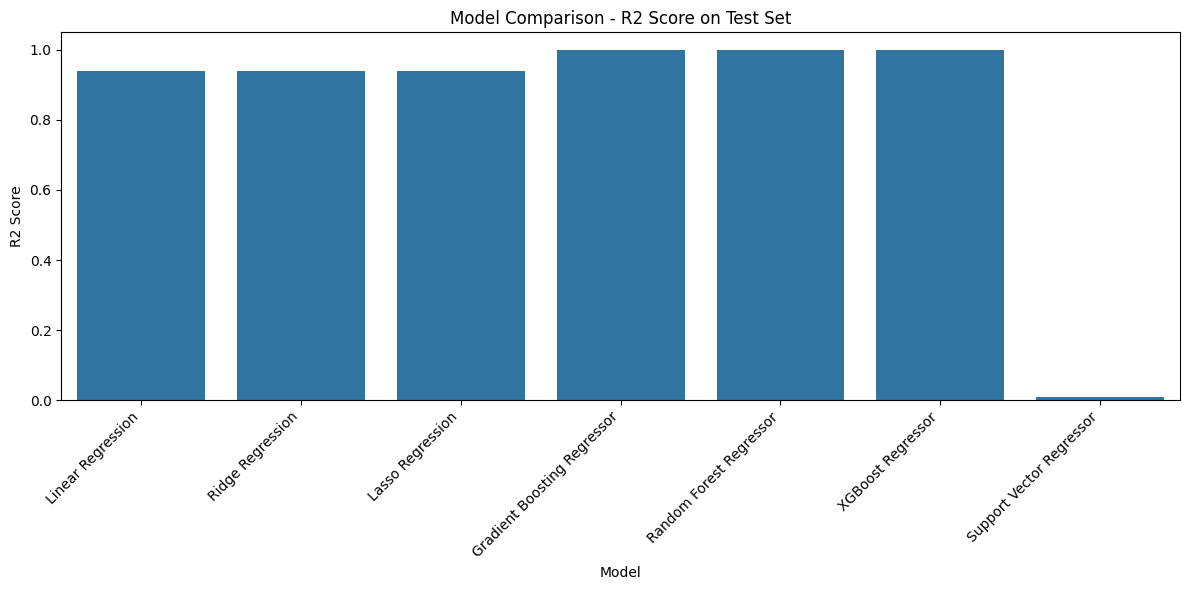

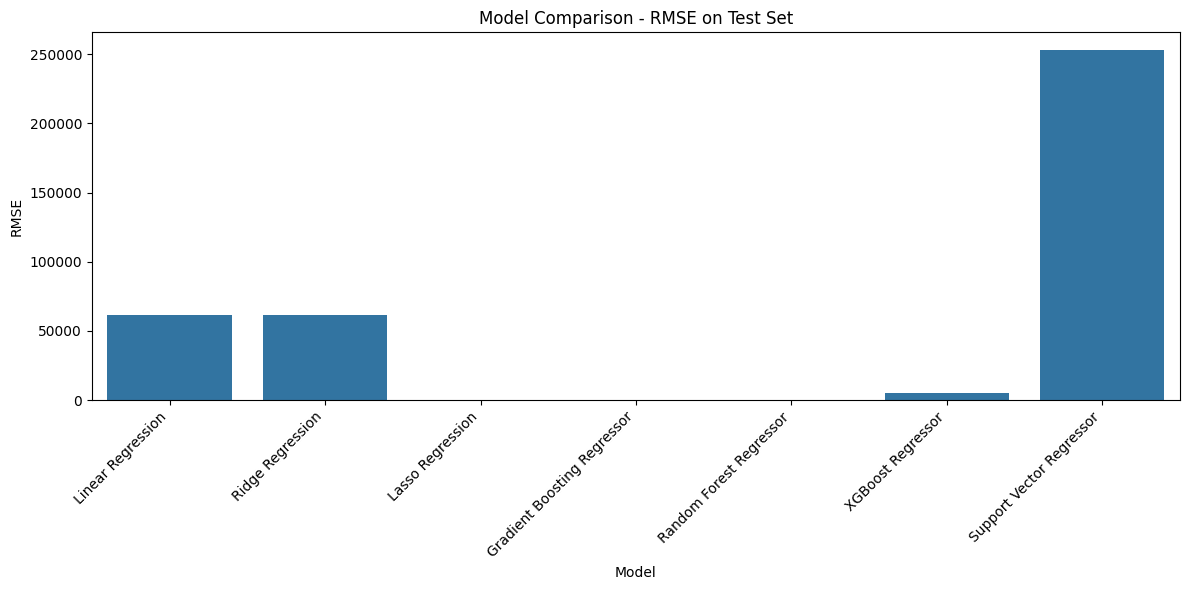

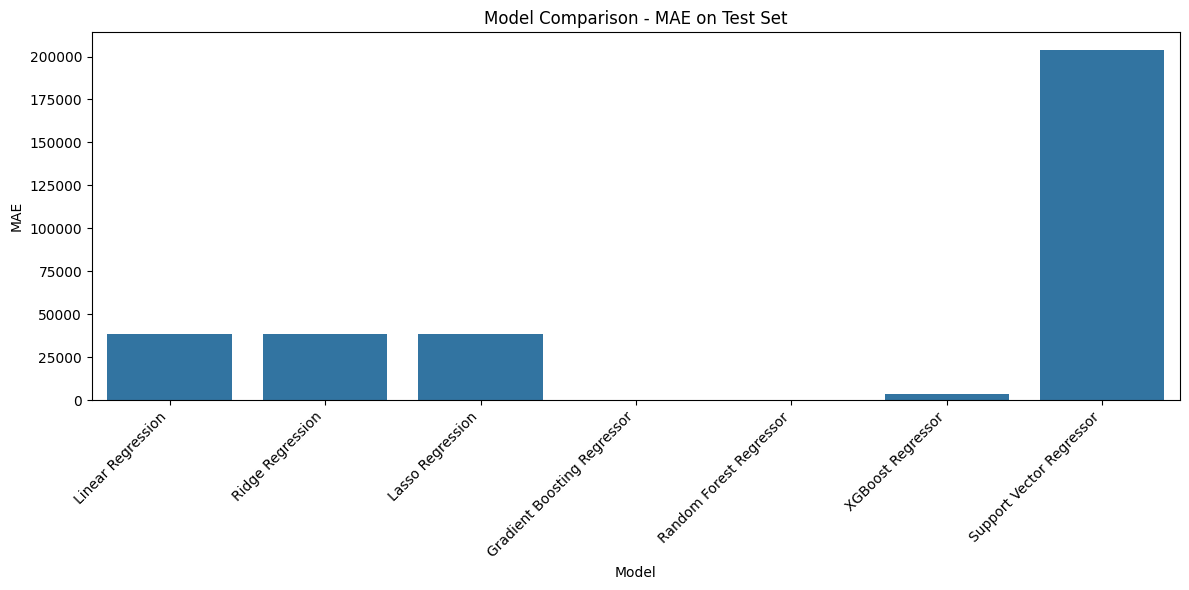

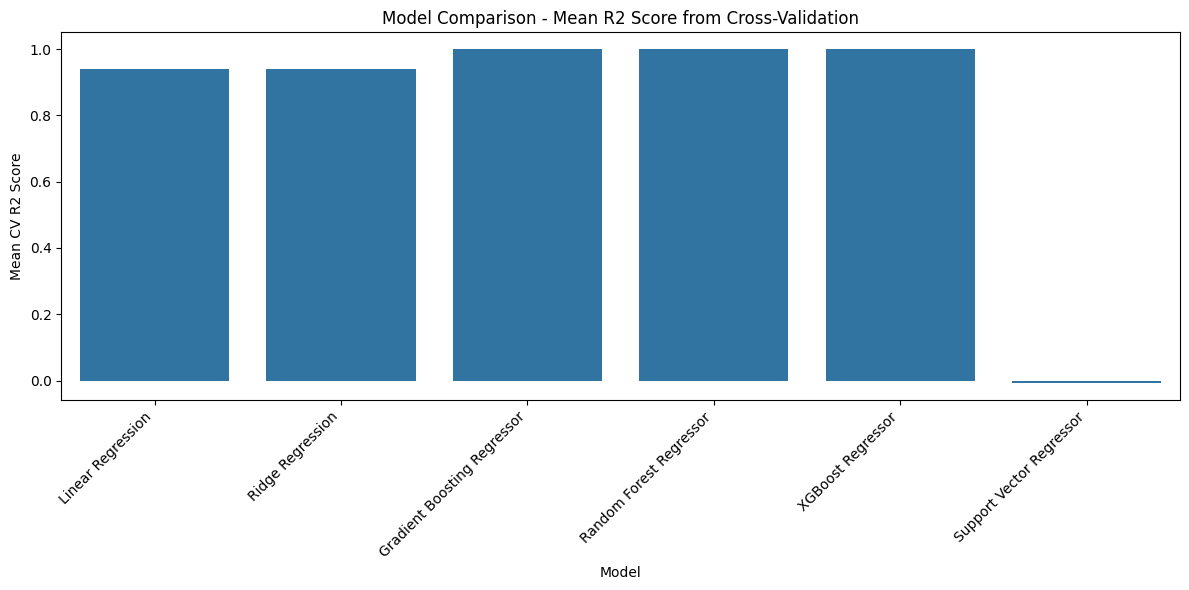

In [50]:
# Create bar plots for performance comparison

# R2 (Test) comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y='R2 (Test)', data=performance_df)
plt.title('Model Comparison - R2 Score on Test Set')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# RMSE comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y='RMSE', data=performance_df)
plt.title('Model Comparison - RMSE on Test Set')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# MAE comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y='MAE', data=performance_df)
plt.title('Model Comparison - MAE on Test Set')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# R2 (CV Mean) comparison (excluding models with N/A)
performance_df_cv = performance_df[performance_df['R2 (CV Mean)'] != 'N/A'].copy()
if not performance_df_cv.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=performance_df_cv.index, y='R2 (CV Mean)', data=performance_df_cv)
    plt.title('Model Comparison - Mean R2 Score from Cross-Validation')
    plt.xlabel('Model')
    plt.ylabel('Mean CV R2 Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()